In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import altair as alt
from sklearn.preprocessing import StandardScaler

In [19]:
file_url = 'https://raw.githubusercontent.com/TrainingByPackt/The-Data-Science-Workshop/master/Chapter05/DataSet/german.data-numeric'

In [20]:
df = pd.read_csv(file_url, header=None, sep='\s\s+', prefix='X')

C:\Users\adrianc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [21]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1.0
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2.0
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1.0
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1.0
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2.0


In [22]:
X = df[['X3', 'X9']]

In [23]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

C:\Users\adrianc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\adrianc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [24]:
clusters = pd.DataFrame()
inertia = []

In [25]:
clusters['cluster_range'] = range(1, 15)

In [26]:
for k in clusters['cluster_range']:
    kmeans = KMeans(n_clusters=k, random_state=8).fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [27]:
clusters['inertia'] = inertia

In [28]:
clusters

,cluster_range,inertia
0,1,2000.000000
1,2,1280.617612
2,3,767.694985
3,4,576.086134
4,5,443.899592
5,6,360.418261
6,7,291.398267
7,8,252.704796
8,9,219.531292
9,10,193.202261


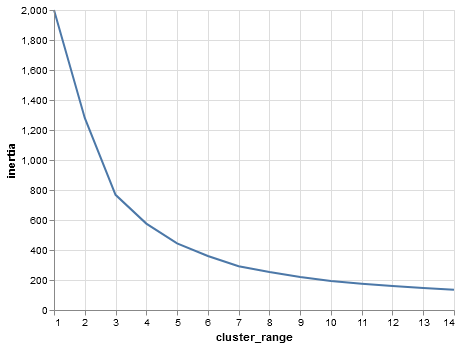

In [30]:
alt.Chart(clusters).mark_line().encode(alt.X('cluster_range'), alt.Y('inertia'))

In [31]:
clusters_number = 5

In [32]:
df['cluster'] = kmeans.predict(X_scaled)

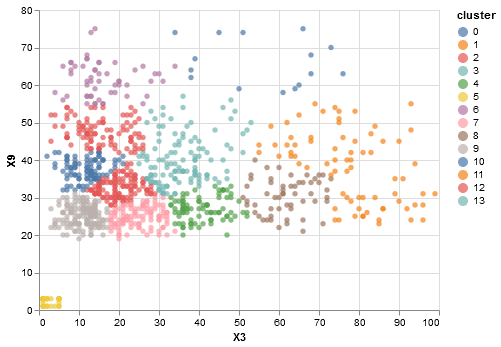

In [33]:
scatter_plot = alt.Chart(df).mark_circle()
scatter_plot.encode(x='X3', y='X9',color='cluster:N')